# Example 1: Single Transmon

In [1]:
%load_ext autoreload
%autoreload 2
import time 

In [2]:
import design as d
import json
with open('design_variables.json') as in_file:
    dv = json.load(in_file)
import qdesignoptimizer.utils.utils_design_variables as u
from qdesignoptimizer.utils.utils_design import create_chip_base
import mini_studies as ms
import optimization_targets as ot
import target_parameters as tp
import plot_settings as ps

from qdesignoptimizer.design_analysis import DesignAnalysis, DesignAnalysisState

## Design assembly

In [3]:
CHIP_NAME = "transmon_chip"
OPEN_GUI = True
CHIP_TYPE = {"size_x": "10mm",
             "size_y": "10mm",
             "size_z": "-300um"}
design, gui = create_chip_base(chip_name=CHIP_NAME, chip_type=CHIP_TYPE, open_gui=OPEN_GUI)

u.add_design_variables_to_design(design, dv)

In [4]:
def render_qiskit_metal_design(design, gui):
    d.add_branch(design, 0, gui)
    d.add_branch(design, 1, gui)
    d.add_branch(design, 2, gui)
    d.add_branch(design, 3, gui)
    d.add_branch(design, 4, gui)

    d.add_route_interconnects(design, 0, gui)
    d.add_route_interconnects(design, 1, gui)
    d.add_route_interconnects(design, 2, gui)
    d.add_route_interconnects(design, 3, gui)
    
    d.add_launch_pads(design, gui)

render_qiskit_metal_design(design, gui)

## MiniStudy: qubit and resonator

In [8]:
MINI_STUDY_BRANCH = 0
MINI_STUDY = ms.get_mini_study_qb_res(branch=MINI_STUDY_BRANCH)
RENDER_QISKIT_METAL = lambda design: render_qiskit_metal_design(design, gui)
opt_targets = ot.get_opt_targets_qb_res(branch=MINI_STUDY_BRANCH)

In [7]:
design_analysis_state = DesignAnalysisState(design, RENDER_QISKIT_METAL, tp.TARGET_PARAMS)
design_analysis = DesignAnalysis(
    design_analysis_state, 
    mini_study=MINI_STUDY, 
    opt_targets=opt_targets,
    save_path=CHIP_NAME + "_" + time.strftime("%Y%m%d-%H%M%S"),
    update_parameters = False,
    plot_settings=ps.PLOT_SETTINGS,
    plot_branches_separately=False
    )


nbr_runs = 8
nbr_passes = 5

delta_f = 0.001
for i in range(nbr_runs):   
    design_analysis.update_nbr_passes(nbr_passes)
    design_analysis.update_delta_f(delta_f)
    design_analysis.optimize_target({}, {})
    design_analysis.screenshot(gui=gui, run= i)

[INFO|2025-02-13 11:54:49]: self.eig_solver.sim.setup 
{
    "name": "Resonator_setup",
    "reuse_selected_design": true,
    "reuse_setup": true,
    "min_freq_ghz": 1,
    "n_modes": 1,
    "max_delta_f": 0.5,
    "max_passes": 10,
    "min_passes": 1,
    "min_converged": 1,
    "pct_refinement": 30,
    "basis_order": 1,
    "vars": {
        "Lj": "10 nH",
        "Cj": "0 fF"
    }
}
INFO 11:54AM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:54AM [load_ansys_project]: 	Opened Ansys App
INFO 11:54AM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 11:54AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/campana/Documents/Ansoft/
	Project:   Project56
INFO 11:54AM [connect_design]: 	Opened active design
	Design:    get_mini_study_qb_res [Solution type: Eigenmode]
INFO 11:54AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:54AM [connect]: 	Connected to project "Project56" and design "get_mini_study_qb_res" 😀

Initializing new desktop!
PyAEDT INFO: StdOut is enabled
PyAEDT INFO: Log on file is enabled
PyAEDT INFO: Log on Desktop Message Manager is enabled
PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.
PyAEDT INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.
PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.2\Win64.
PyAEDT INFO: Launching AEDT with COM plugin using PythonNET.
PyAEDT INFO: AEDT 2021.2 Started with process ID 23148.
PyAEDT INFO: pyaedt v0.6.94
PyAEDT INFO: Python version 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:07:43) [MSC v.1942 64 bit (AMD64)]
PyAEDT INFO: AEDT 2021.2.0 Build Date 2021-06-02 22:21:55
PyAEDT INFO: No project is defined. Project Project56 exists and has been read.
PyAEDT INFO: Active Design set to get_mini_study_qb_res
PyAEDT INFO: Aedt Objects correctly read


INFO 11:55AM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.45290279573097e-23
        energy_elec_substrate = 1.32745061819938e-23
        EPR of substrate = 91.4%

        energy_mag    = 1.45130180161774e-23
        energy_mag % of energy_elec_all  = 99.9%
        

Variation 0  [1/1]

  Mode 0 at 4.14 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  5.727e-24 4.911e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.75%
	jj_NAME_QB

WARNING 11:56AM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 11-56-49.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.024444
1    1.032984
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.967856
1     0.001123

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0              1
1              1
*** P (participation matrix, normalized.)
      0.99
    0.0011

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       219    0.949
     0.949  0.00103

*** Chi matrix ND (MHz) 
       246     0.93
      0.93 0.000884

*** Frequencies O1 PT (MHz)
0    3925.676560
1    7942.413532
dtype: float64

*** Frequencies ND (MHz)
0    3912.527224
1    7942.406810
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 11:56:57]: freq_ND_results
{
    "0": {
        "0": 3912.5272241794405,
        "1": 7942.406810318754
    }
}
[INFO|2025-02-13 11:56:57]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "16.932876405659812 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "6.7458701431050585 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "390.35560335631493 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_c

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1] [7942406810.318754]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1] [414035.52639]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1] [None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1] [None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1] [None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1] [None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1] [None]
0 <qdesignoptimizer.utils.sim

[WARNING|2025-02-13 11:56:57]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 11:57:02]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "16.34844844382627 nH",
    "design_var_res_length_0": "7.472276857602866 mm",
    "design_var_ind_coupl_length_0": "453.90547278968853 um",
    "design_var_qb_pad_width_0": "545.2025544938493 um",
    "design_var_res_qb_coupl_length_0": "172.3965488975616 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 16.932876405659812, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 6.7458701431050585, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 390.35560335631493, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 498.4926189168252, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 162.550429

INFO 11:58AM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 4.43006440913728e-23
        energy_elec_substrate = 4.05773021205418e-23
        EPR of substrate = 91.6%

        energy_mag    = 4.42324031460369e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.15 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  8.228e-24 7.812e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.82%
	jj_NAME_QB

WARNING 11:59AM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 11-59-02.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.022877
1    1.037077
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.968449
1     0.001527

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0              1
1             -1
*** P (participation matrix, normalized.)
      0.99
    0.0015

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       212     1.12
      1.12  0.00148

*** Chi matrix ND (MHz) 
       237     1.03
      1.03  0.00126

*** Frequencies O1 PT (MHz)
0    3940.555395
1    7132.517658
dtype: float64

*** Frequencies ND (MHz)
0    3928.302696
1    7132.523028
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 11:59:10]: freq_ND_results
{
    "0": {
        "0": 3928.3026963010134,
        "1": 7132.523027867968
    }
}
[INFO|2025-02-13 11:59:10]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "16.34844844382627 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.472276857602866 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "453.90547278968853 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_cou

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2] [7942406810.318754, 7132523027.867969]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2] [414035.52639, 348693.129028]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2] [None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2] [None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2] [None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2] [None, None]
1 <qdesignoptimizer.u

[WARNING|2025-02-13 11:59:10]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 11:59:15]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "15.884486622068561 nH",
    "design_var_res_length_0": "7.585308258346987 mm",
    "design_var_ind_coupl_length_0": "567.1111721118162 um",
    "design_var_qb_pad_width_0": "578.9182359484834 um",
    "design_var_res_qb_coupl_length_0": "167.76920294362185 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 16.34844844382627, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.472276857602866, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 453.90547278968853, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 545.2025544938493, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 172.39654889

INFO 12:00PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.19305520018091e-23
        energy_elec_substrate = 1.08962594203576e-23
        EPR of substrate = 91.3%

        energy_mag    = 1.19114328562612e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.11 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  2.077e-24 2.024e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.93%
	jj_NAME_QB

WARNING 12:01PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-01-16.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.022138
1    1.038666
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.968901
1     0.001576

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0             -1
1             -1
*** P (participation matrix, normalized.)
      0.99
    0.0016

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       201     1.08
      1.08  0.00146

*** Chi matrix ND (MHz) 
       225    0.994
     0.994   0.0012

*** Frequencies O1 PT (MHz)
0    3907.473701
1    6950.518011
dtype: float64

*** Frequencies ND (MHz)
0    3896.332171
1    6950.524941
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 12:01:24]: freq_ND_results
{
    "0": {
        "0": 3896.332171407068,
        "1": 6950.52494078085
    }
}
[INFO|2025-02-13 12:01:24]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "15.884486622068561 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.585308258346987 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "567.1111721118162 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_coupl

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3] [7942406810.318754, 7132523027.867969, 6950524940.780849]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3] [414035.52639, 348693.129028, 364371.37621400005]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3] [None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3] [None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3] [None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.

[WARNING|2025-02-13 12:01:24]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 12:01:30]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "15.236195037791664 nH",
    "design_var_res_length_0": "7.542411669019245 mm",
    "design_var_ind_coupl_length_0": "695.6079529690338 um",
    "design_var_qb_pad_width_0": "588.2374793788936 um",
    "design_var_res_qb_coupl_length_0": "168.63088578482277 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 15.884486622068561, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.585308258346987, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 567.1111721118162, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 578.9182359484834, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 167.76920294

INFO 12:02PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 3.8118423179075e-23
        energy_elec_substrate = 3.48640225613826e-23
        EPR of substrate = 91.5%

        energy_mag    = 3.80561280123481e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.16 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.044e-23 1.061e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.96%
	jj_NAME_QB0

WARNING 12:03PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-03-35.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.021379
1    1.030123
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.969219
1     0.001628

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0             -1
1              1
*** P (participation matrix, normalized.)
      0.99
    0.0016

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       198     1.07
      1.07  0.00146

*** Chi matrix ND (MHz) 
       220    0.972
     0.972  0.00117

*** Frequencies O1 PT (MHz)
0    3963.459074
1    6863.783814
dtype: float64

*** Frequencies ND (MHz)
0    3952.865990
1    6863.793425
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 12:03:43]: freq_ND_results
{
    "0": {
        "0": 3952.86599021924,
        "1": 6863.7934245419565
    }
}
[INFO|2025-02-13 12:03:43]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "15.236195037791664 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.542411669019245 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "695.6079529690338 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_coup

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4] [7942406810.318754, 7132523027.867969, 6950524940.780849, 6863793424.541957]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4] [414035.52639, 348693.129028, 364371.37621400005, 489828.217268]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4] [None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4] [None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4] [None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4] [None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4] [None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet 

[WARNING|2025-02-13 12:03:43]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 12:03:49]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "14.950748475790329 nH",
    "design_var_res_length_0": "7.4250151065556835 mm",
    "design_var_ind_coupl_length_0": "755.0187430610997 um",
    "design_var_qb_pad_width_0": "588.2374793908144 um",
    "design_var_res_qb_coupl_length_0": "172.4763104070151 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 15.236195037791664, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.542411669019245, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 695.6079529690338, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 588.2374793788936, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 168.63088578

INFO 12:04PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 9.15767780862746e-24
        energy_elec_substrate = 8.37385756666029e-24
        EPR of substrate = 91.4%

        energy_mag    = 9.14175270353439e-24
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.16 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.594e-24 1.652e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.00%
	jj_NAME_QB

WARNING 12:05PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-05-48.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.021000
1    1.023951
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.969379
1     0.001754

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0              1
1             -1
*** P (participation matrix, normalized.)
      0.99
    0.0018

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       194     1.14
      1.14  0.00169

*** Chi matrix ND (MHz) 
       215     1.04
      1.04  0.00138

*** Frequencies O1 PT (MHz)
0    3963.476149
1    6927.080349
dtype: float64

*** Frequencies ND (MHz)
0    3953.331463
1    6927.089306
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 12:05:54]: freq_ND_results
{
    "0": {
        "0": 3953.3314633895257,
        "1": 6927.089306168142
    }
}
[INFO|2025-02-13 12:05:54]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "14.950748475790329 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.4250151065556835 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "755.0187430610997 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_co

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5] [7942406810.318754, 7132523027.867969, 6950524940.780849, 6863793424.541957, 6927089306.168141]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5] [414035.52639, 348693.129028, 364371.37621400005, 489828.217268, 1012639.3291440001]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5] [None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5] [None, None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5] [None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5] [None, None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4

[WARNING|2025-02-13 12:05:55]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 12:06:01]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "14.673383235357369 nH",
    "design_var_res_length_0": "7.363256614991342 mm",
    "design_var_ind_coupl_length_0": "615.9266871687901 um",
    "design_var_qb_pad_width_0": "577.2344245286109 um",
    "design_var_res_qb_coupl_length_0": "166.72307064359202 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 14.950748475790329, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.4250151065556835, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 755.0187430610997, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 588.2374793908144, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 172.4763104

INFO 12:07PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 3.79631278426135e-23
        energy_elec_substrate = 3.47588254900415e-23
        EPR of substrate = 91.6%

        energy_mag    = 3.79050941155247e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.24 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  8.087e-24  8.28e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.96%
	jj_NAME_QB

WARNING 12:08PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-08-06.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.021424
1    1.036175
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.969102
1     0.001508

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0             -1
1             -1
*** P (participation matrix, normalized.)
      0.99
    0.0015

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       198     1.01
      1.01  0.00129

*** Chi matrix ND (MHz) 
       220    0.928
     0.928  0.00106

*** Frequencies O1 PT (MHz)
0    4045.489121
1    7122.032512
dtype: float64

*** Frequencies ND (MHz)
0    4035.106613
1    7122.039726
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 12:08:14]: freq_ND_results
{
    "0": {
        "0": 4035.1066132069973,
        "1": 7122.039726263798
    }
}
[INFO|2025-02-13 12:08:14]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "14.673383235357369 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.363256614991342 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "615.9266871687901 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_cou

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6] [7942406810.318754, 7132523027.867969, 6950524940.780849, 6863793424.541957, 6927089306.168141, 7122039726.263798]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6] [414035.52639, 348693.129028, 364371.37621400005, 489828.217268, 1012639.3291440001, 527500.1903260001]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6] [None, None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6] [None, None, None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6] [None, None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6] [None, None, None, None, None, None]
0 <qdesignoptim

[WARNING|2025-02-13 12:08:14]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 12:08:20]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "14.87810576838331 nH",
    "design_var_res_length_0": "7.465906137121056 mm",
    "design_var_ind_coupl_length_0": "648.6980292793385 um",
    "design_var_qb_pad_width_0": "577.2344245405319 um",
    "design_var_res_qb_coupl_length_0": "177.1314498695859 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 14.673383235357369, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.363256614991342, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 615.9266871687901, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 577.2344245286109, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 166.72307064

INFO 12:09PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 2.69053108048133e-23
        energy_elec_substrate = 2.45890813601721e-23
        EPR of substrate = 91.4%

        energy_mag    = 2.6859781266398e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.17 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  4.307e-24 4.521e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.00%
	jj_NAME_QB0

WARNING 12:10PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-10-22.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.020967
1    1.025047
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.969282
1     0.001705

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0             -1
1              1
*** P (participation matrix, normalized.)
      0.99
    0.0017

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       194     1.12
      1.12  0.00163

*** Chi matrix ND (MHz) 
       215     1.03
      1.03  0.00134

*** Frequencies O1 PT (MHz)
0    3975.185856
1    7012.943861
dtype: float64

*** Frequencies ND (MHz)
0    3965.067386
1    7012.951596
dtype: float64

*** Q_coupling
Empty D

[INFO|2025-02-13 12:10:29]: freq_ND_results
{
    "0": {
        "0": 3965.0673861659857,
        "1": 7012.951595782746
    }
}
[INFO|2025-02-13 12:10:29]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "14.87810576838331 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.465906137121056 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "648.6980292793385 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_coup

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7] [7942406810.318754, 7132523027.867969, 6950524940.780849, 6863793424.541957, 6927089306.168141, 7122039726.263798, 7012951595.782746]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6, 7] [414035.52639, 348693.129028, 364371.37621400005, 489828.217268, 1012639.3291440001, 527500.1903260001, 660089.623022]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7] [None, None, None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6, 7] [None, None, None, None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7] [None, None, None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 

[WARNING|2025-02-13 12:10:30]: Does not update passes in Scattering simulation not in Capacitance matrix simulation.
[INFO|2025-02-13 12:10:36]: Updated_design_vars
{
    "design_var_lj_NAME_QB0": "14.668561737956784 nH",
    "design_var_res_length_0": "7.4769368423841716 mm",
    "design_var_ind_coupl_length_0": "624.5136673635698 um",
    "design_var_qb_pad_width_0": "566.5391205164191 um",
    "design_var_res_qb_coupl_length_0": "172.99094183488458 um"
}


DEBUGGGG
{'cpw_width': 10.0, 'cpw_gap': 6.0, 'design_var_lj_NAME_QB0': 14.87810576838331, 'design_var_lj_NAME_QB1': 12.0, 'design_var_lj_NAME_QB2': 12.0, 'design_var_lj_NAME_QB3': 12.0, 'design_var_lj_NAME_QB4': 12.0, 'design_var_cj_NAME_QB0': 0.0, 'design_var_cj_NAME_QB1': 0.0, 'design_var_cj_NAME_QB2': 0.0, 'design_var_cj_NAME_QB3': 0.0, 'design_var_cj_NAME_QB4': 0.0, 'design_var_res_length_0': 7.465906137121056, 'design_var_res_length_1': 5.0, 'design_var_res_length_2': 5.0, 'design_var_res_length_3': 5.0, 'design_var_res_length_4': 5.0, 'design_var_ind_coupl_length_0': 648.6980292793385, 'design_var_ind_coupl_length_1': 200.0, 'design_var_ind_coupl_length_2': 200.0, 'design_var_ind_coupl_length_3': 200.0, 'design_var_ind_coupl_length_4': 200.0, 'design_var_qb_pad_width_0': 577.2344245405319, 'design_var_qb_pad_width_1': 400.0, 'design_var_qb_pad_width_2': 400.0, 'design_var_qb_pad_width_3': 400.0, 'design_var_qb_pad_width_4': 400.0, 'design_var_res_qb_coupl_length_0': 177.131449869

INFO 12:11PM [analyze]: Analyzing setup Setup


Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1
Design "get_mini_study_qb_res" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.44434595454977e-23
        energy_elec_substrate = 1.32092225268482e-23
        EPR of substrate = 91.5%

        energy_mag    = 1.44164315019088e-23
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 4.26 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.9%   2.85e-24 3.096e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj_NAME_QB

WARNING 12:12PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project56\get_mini_study_qb_res\2025-02-13 12-12-43.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.022061
1    1.028764
dtype: float64

Pm_norm idx =
   jj_NAME_QB0
0         True
1        False
*** P (participation matrix, not normlz.)
   jj_NAME_QB0
0     0.967891
1     0.001870

*** S (sign-bit matrix)
   s_jj_NAME_QB0
0             -1
1              1
*** P (participation matrix, normalized.)
      0.99
    0.0019

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       199     1.24
      1.24  0.00193

*** Chi matrix ND (MHz) 
       221     1.13
      1.13  0.00156

*** Frequencies O1 PT (MHz)
0    4060.242802
1    7019.429985
dtype: float64

*** Frequencies ND (MHz)
0    4049.74940
1    7019.44115
dtype: float64

*** Q_coupling
Empty Dat

[INFO|2025-02-13 12:12:50]: freq_ND_results
{
    "0": {
        "0": 4049.7493998582277,
        "1": 7019.441150304227
    }
}
[INFO|2025-02-13 12:12:50]: Design variables
{
    "cpw_width": "10 um",
    "cpw_gap": "6 um",
    "design_var_lj_NAME_QB0": "14.668561737956784 nH",
    "design_var_lj_NAME_QB1": "12nH",
    "design_var_lj_NAME_QB2": "12nH",
    "design_var_lj_NAME_QB3": "12nH",
    "design_var_lj_NAME_QB4": "12nH",
    "design_var_cj_NAME_QB0": "0fF",
    "design_var_cj_NAME_QB1": "0fF",
    "design_var_cj_NAME_QB2": "0fF",
    "design_var_cj_NAME_QB3": "0fF",
    "design_var_cj_NAME_QB4": "0fF",
    "design_var_res_length_0": "7.4769368423841716 mm",
    "design_var_res_length_1": "5mm",
    "design_var_res_length_2": "5mm",
    "design_var_res_length_3": "5mm",
    "design_var_res_length_4": "5mm",
    "design_var_ind_coupl_length_0": "624.5136673635698 um",
    "design_var_ind_coupl_length_1": "200um",
    "design_var_ind_coupl_length_2": "200um",
    "design_var_ind_co

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7, 8] [7942406810.318754, 7132523027.867969, 6950524940.780849, 6863793424.541957, 6927089306.168141, 7122039726.263798, 7012951595.782746, 7019441150.304228]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6, 7, 8] [414035.52639, 348693.129028, 364371.37621400005, 489828.217268, 1012639.3291440001, 527500.1903260001, 660089.623022, 792601.634108]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7, 8] [None, None, None, None, None, None, None, None]
1 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F924370> [1, 2, 3, 4, 5, 6, 7, 8] [None, None, None, None, None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001DB6F927FA0> [1, 2, 3, 4, 5, 6, 7, 8] [None, None, None, None, None, None, None, None]
1 <qdesignoptimizer.u

In [8]:
design_analysis.overwrite_parameters()

[INFO|2025-02-13 13:09:32]: Overwritten parameters
{
    "design_var_lj_NAME_QB0": "14.668561737956784 nH",
    "design_var_res_length_0": "7.4769368423841716 mm",
    "design_var_ind_coupl_length_0": "624.5136673635698 um",
    "design_var_qb_pad_width_0": "566.5391205164191 um",
    "design_var_res_qb_coupl_length_0": "172.99094183488458 um"
}


## MiniStudy: qubit decay in charge line
The T1 of the qubit is limited by its decay into the charge line.
This ministudy will change the distance of the charge line from the transmon pocket to optimize a T1 limit of 1 ms. This value is computed with simple capacitance matrix simulations and a classical model, assuming that the qubit frequency has already been optimized.

In [5]:
MINI_STUDY_BRANCH = 0
MINI_STUDY = ms.get_mini_study_qb_charge_line(branch=MINI_STUDY_BRANCH)
opt_targets = ot.get_opt_targets_qb_charge_line(branch=MINI_STUDY_BRANCH)
RENDER_QISKIT_METAL = lambda design: render_qiskit_metal_design(design, gui)

[INFO|2025-02-14 11:50:31]: self.eig_solver.sim.setup 
{
    "name": "Resonator_setup",
    "reuse_selected_design": true,
    "reuse_setup": true,
    "min_freq_ghz": 1,
    "n_modes": 1,
    "max_delta_f": 0.5,
    "max_passes": 10,
    "min_passes": 1,
    "min_converged": 1,
    "pct_refinement": 30,
    "basis_order": 1,
    "vars": {
        "Lj": "10 nH",
        "Cj": "0 fF"
    }
}
INFO 11:50AM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:50AM [load_ansys_project]: 	Opened Ansys App
INFO 11:50AM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 11:50AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/campana/Documents/Ansoft/
	Project:   Project59
INFO 11:50AM [connect_design]: 	Opened active design
	Design:    get_mini_study_qb_charge_line [Solution type: Eigenmode]
INFO 11:50AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:50AM [connect]: 	Connected to project "Project59" and design "get_mini_study_q

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1] [0.0006862360581610528]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1] [None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1] [None]


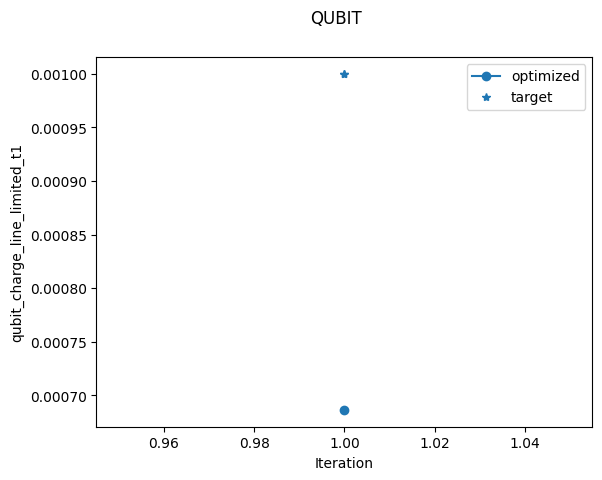

[INFO|2025-02-14 11:51:32]: Updated_design_vars
{
    "design_var_cl_pos_x0": "233.1075384965922 um"
}
[INFO|2025-02-14 11:51:33]: Simulating capacitance matrix study.
INFO 11:51AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:52AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:52AM [analyze]: Analyzing setup Setup
INFO 11:52AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpdqp1o71n.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:52AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmp4kfnxzw6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:52AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpxb22pas6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
IN

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2] [0.0006862360581610528, 0.0009638243321401114]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2] [None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2] [None, None]


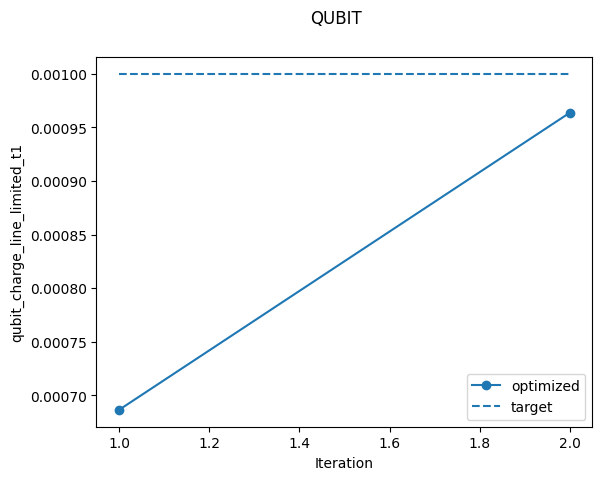

[INFO|2025-02-14 11:52:31]: Updated_design_vars
{
    "design_var_cl_pos_x0": "236.60571466572952 um"
}
[INFO|2025-02-14 11:52:32]: Simulating capacitance matrix study.
INFO 11:52AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:52AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:52AM [analyze]: Analyzing setup Setup
INFO 11:53AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmplw9p8ksn.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:53AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpj798teqw.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:53AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmp3dtvqgrd.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
I

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3] [0.0006862360581610528, 0.0009638243321401114, 0.0009940462226951745]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3] [None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3] [None, None, None]


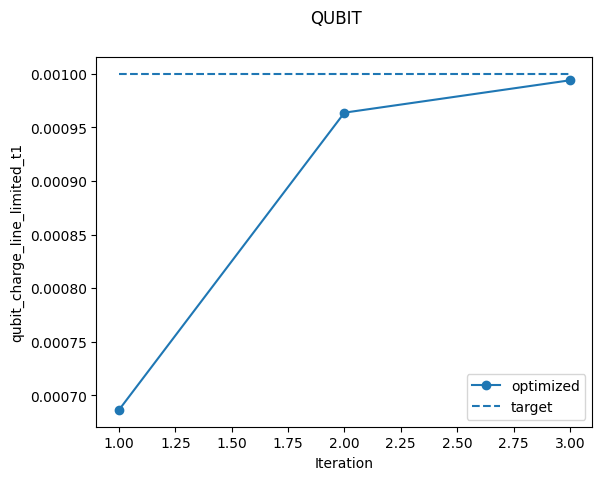

[INFO|2025-02-14 11:53:32]: Updated_design_vars
{
    "design_var_cl_pos_x0": "237.1724830082005 um"
}
[INFO|2025-02-14 11:53:32]: Simulating capacitance matrix study.
INFO 11:53AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:53AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:53AM [analyze]: Analyzing setup Setup
INFO 11:54AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpczoxhoqd.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:54AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpp5kw1o78.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:54AM [get_matrix]: Exporting matrix data to (C:\Users\campana\AppData\Local\Temp\tmpm0c8xb4a.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
IN

0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3, 4] [0.0006862360581610528, 0.0009638243321401114, 0.0009940462226951745, 0.0009876368753029407]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3, 4] [None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3, 4] [None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3, 4] [None, None, None, None]
0 <qdesignoptimizer.utils.sim_plot_progress.OptPltSet object at 0x000001A6A7AFEF80> [1, 2, 3, 4] [None, None, None, None]


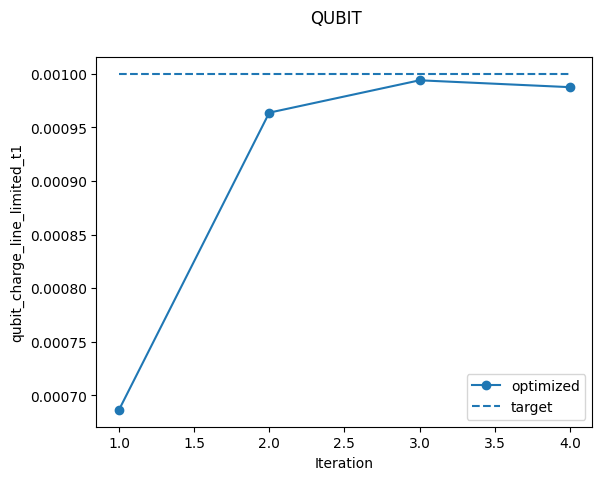

[INFO|2025-02-14 11:54:31]: Updated_design_vars
{
    "design_var_cl_pos_x0": "238.35978340363107 um"
}
[INFO|2025-02-14 11:54:31]: Simulating capacitance matrix study.
INFO 11:54AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:54AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:54AM [analyze]: Analyzing setup Setup


In [ ]:
%matplotlib inline
design_analysis_state = DesignAnalysisState(design, RENDER_QISKIT_METAL, tp.TARGET_PARAMS_CHARGE_LINE_DECAY)
design_analysis = DesignAnalysis(
    design_analysis_state, 
    mini_study=MINI_STUDY, 
    opt_targets=opt_targets,
    save_path=CHIP_NAME + "_" + time.strftime("%Y%m%d-%H%M%S"),
    update_parameters = False,
    plot_settings=ps.PLOT_SETTINGS_CHARGE_LINE_DECAY,
    plot_branches_separately=False
    )


nbr_runs = 5
nbr_passes_cap = 8

for i in range(nbr_runs):   
    design_analysis.update_nbr_passes_capacitance_ministudies(nbr_passes_cap)
    design_analysis.optimize_target({}, {})
    design_analysis.screenshot(gui=gui, run= i)

In [ ]:
design_analysis.overwrite_parameters()

In [3]:
from qdesignoptimizer.utils.utils import close_ansys
close_ansys()